# **US University/College Recommendation**

###  **Abstract** 

Applying to universities in the US can be challenging due to the vast number of options available and the time-consuming process of evaluating each institution based on individual preferences. This project aims to develop a university recommendation model using a comprehensive dataset.

### **Variable Description**

* `Geo Point` - Geographical coordinates (latitude and longitude) of the institution  
* `Geo Shape` - Geographical shape data (coordinates for spatial mapping)  
* `OBJECTID` - Unique identifier for each record in the dataset  
* `IPEDSID` - Integrated Postsecondary Education Data System (IPEDS) ID for the institution  
* `NAME` - Name of the educational institution  
* `ADDRESS` - Physical address of the institution  
* `CITY` - City where the institution is located  
* `STATE` - State where the institution is located  
* `ZIP` - ZIP code of the institution  
* `ZIP4` - Additional ZIP+4 code information  
* `TELEPHONE` - Contact telephone number for the institution  
* `TYPE` - Type of institution  
* `STATUS` - Operational status of the institution (e.g., active)  
* `POPULATION` - Total student population of the institution  
* `COUNTY` - County where the institution is located  
* `COUNTYFIPS` - FIPS code for the county  
* `COUNTRY` - Country where the institution is located  
* `LATITUDE` - Latitude coordinate of the institution  
* `LONGITUDE` - Longitude coordinate of the institution  
* `NAICS_CODE` - North American Industry Classification System (NAICS) code for the institution  
* `NAICS_DESC` - Description of the NAICS classification  
* `SOURCE` - Data source reference  
* `SOURCEDATE` - Date when the data was sourced  
* `VAL_METHOD` - Validation method used for the data  
* `VAL_DATE` - Date when the data was validated  
* `WEBSITE` - Official website of the institution  
* `STFIPS` - State FIPS code  
* `COFIPS` - County FIPS code  
* `SECTOR` - Sector classification (e.g., higher education)  
* `LEVEL_` - Institutional level (e.g., undergraduate, postgraduate)  
* `HI_OFFER` - Highest level of education offered  
* `DEG_GRANT` - Indicates whether degrees are granted  
* `LOCALE` - Locale classification (urban, rural, etc.)  
* `CLOSE_DATE` - Date when the institution closed  
* `MERGE_ID` - Merge identifier for data integration  
* `ALIAS` - Alternative name or alias for the institution  
* `SIZE_SET` - Size classification of the institution  
* `INST_SIZE` - Institutional size category  
* `PT_ENROLL` - Number of part-time enrolled students  
* `FT_ENROLL` - Number of full-time enrolled students  
* `TOT_ENROLL` - Total student enrollment  
* `HOUSING` - Indicates if housing is provided  
* `DORM_CAP` - Dormitory capacity (number of students)  
* `TOT_EMP` - Total number of employees  
* `SHELTER_ID` - Shelter identifier  

### **Datasets**  
* The dataset consists of **45 attributes** related to educational institutions, including various independent variables such as `NAME`, `ADDRESS`, `CITY`, `STATE`, `POPULATION`, `COUNTY`, `LATITUDE`, and `LONGITUDE`.  
* These attributes capture detailed information about the institutions, including geographical data, classification codes, and operational status.  
* The primary focus is to use this dataset for building a **recommendation model** to help users identify institutions that match their preferences.  
  

In [106]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import folium
from scipy.stats import norm
from scipy.stats import probplot

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

**CLEANING AND PREPROCESSING**

In [23]:
!pip install openpyxl

In [72]:
university = pd.read_excel('/kaggle/input/university/us-colleges-and-universities.xlsx')

Understanding the Data and statistical analysis

In [25]:
university.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6559 entries, 0 to 6558
Data columns (total 45 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Geo Point   6559 non-null   object 
 1   Geo Shape   6559 non-null   object 
 2   OBJECTID    6559 non-null   int64  
 3   IPEDSID     6559 non-null   int64  
 4   NAME        6559 non-null   object 
 5   ADDRESS     6558 non-null   object 
 6   CITY        6559 non-null   object 
 7   STATE       6559 non-null   object 
 8   ZIP         6559 non-null   int64  
 9   ZIP4        6559 non-null   object 
 10  TELEPHONE   6559 non-null   object 
 11  TYPE        6559 non-null   int64  
 12  STATUS      6559 non-null   object 
 13  POPULATION  6559 non-null   int64  
 14  COUNTY      6559 non-null   object 
 15  COUNTYFIPS  6559 non-null   object 
 16  COUNTRY     6559 non-null   object 
 17  LATITUDE    6559 non-null   float64
 18  LONGITUDE   6559 non-null   float64
 19  NAICS_CODE  6559 non-null  

In [26]:
university.shape

(6559, 45)

In [27]:
university.head(10)

,Geo Point,Geo Shape,OBJECTID,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,...,ALIAS,SIZE_SET,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,HOUSING,DORM_CAP,TOT_EMP,SHELTER_ID
0,"45.48038428000007, -122.67453292999994","{""coordinates"":[-122.67453292999994,45.4803842...",16,443599,AMERICAN COLLEGE OF HEALTHCARE SCIENCES,5005 S. MACADAM AVE,PORTLAND,OR,97239,NOT AVAILABLE,...,NOT AVAILABLE,26,1,692,164,856,2,-999,64,NOT AVAILABLE
1,"42.388647, -72.529312","{""coordinates"":[-72.529312,42.388647],""type"":""...",23,166629,UNIVERSITY OF MASSACHUSETTS-AMHERST,374 WHITMORE BUILDING 181 PRESIDENTS DRIVE,AMHERST,MA,1003,NOT AVAILABLE,...,UMASS AMHERST,15,5,6941,24701,31642,1,14015,5685,NOT AVAILABLE
2,"39.24427778200004, -119.93912465099999","{""coordinates"":[-119.93912465099999,39.2442777...",28,182458,SIERRA NEVADA UNIVERSITY,999 TAHOE BLVD.,INCLINE VILLAGE,NV,89451,NOT AVAILABLE,...,SNU,19,1,146,471,617,1,200,201,NOT AVAILABLE
3,"33.13142857200006, -117.118565978","{""coordinates"":[-117.118565978,33.131428572000...",81,468848,UNITED EDUCATION INSTITUTE-UEI COLLEGE SAN MARCOS,2085 MONTIEL ROAD,SAN MARCOS,CA,92069,3587,...,NOT AVAILABLE,-2,1,-999,719,719,2,-999,57,NOT AVAILABLE
4,"26.70538, -80.136711","{""coordinates"":[-80.136711,26.70538],""type"":""P...",110,487393,FLORIDA CAREER COLLEGE-WEST PALM BEACH,6058 OKEECHOBEE BLVD.,WEST PALM BEACH,FL,33417,4326,...,NOT AVAILABLE,-2,1,-999,869,869,2,-999,60,NOT AVAILABLE
5,"38.72876088500004, -90.38025209799997","{""coordinates"":[-90.38025209799997,38.72876088...",136,461573,AMERICAN TRADE SCHOOL,3925 INDUSTRIAL DRIVE,SAINT ANN,MO,63074,1807,...,NOT AVAILABLE,-2,1,-999,128,128,2,-999,14,NOT AVAILABLE
6,"33.937727, -83.37143","{""coordinates"":[-83.37143,33.937727],""type"":""P...",164,139959,UNIVERSITY OF GEORGIA,ADMINISTRATION BUILDING,ATHENS,GA,30602,NOT AVAILABLE,...,NOT AVAILABLE,15,5,4196,34951,39147,1,10050,11733,10774465
7,"33.463987, -86.908933","{""coordinates"":[-86.908933,33.463987],""type"":""...",192,487816,MIDFIELD INSTITUTE OF COSMETOLOGY,26 B PHILLIPS DRIVE,MIDFIELD,AL,35228,2233,...,NOT AVAILABLE,-2,1,5,12,17,2,-999,7,NOT AVAILABLE
8,"41.33127, -74.159642","{""coordinates"":[-74.159642,41.33127],""type"":""P...",206,488101,YESHIVAS MAHARIT D'SATMAR,475 COUNTY ROUTE 105,MONROE,NY,10950,NOT AVAILABLE,...,NOT AVAILABLE,-2,1,-999,143,143,1,35,23,NOT AVAILABLE
9,"47.64894, -122.377121","{""coordinates"":[-122.377121,47.64894],""type"":""...",229,488448,SEATTLE FILM INSTITUTE,3210 16TH AVENUE W,SEATTLE,WA,98119,1707,...,NOT AVAILABLE,-2,1,8,88,96,2,-999,40,NOT AVAILABLE


In [28]:
university.dtypes

Geo Point      object
Geo Shape      object
OBJECTID        int64
IPEDSID         int64
NAME           object
ADDRESS        object
CITY           object
STATE          object
ZIP             int64
ZIP4           object
TELEPHONE      object
TYPE            int64
STATUS         object
POPULATION      int64
COUNTY         object
COUNTYFIPS     object
COUNTRY        object
LATITUDE      float64
LONGITUDE     float64
NAICS_CODE      int64
NAICS_DESC     object
SOURCE         object
SOURCEDATE     object
VAL_METHOD     object
VAL_DATE       object
WEBSITE        object
STFIPS         object
COFIPS         object
SECTOR          int64
LEVEL_          int64
HI_OFFER        int64
DEG_GRANT       int64
LOCALE          int64
CLOSE_DATE     object
MERGE_ID        int64
ALIAS          object
SIZE_SET        int64
INST_SIZE       int64
PT_ENROLL       int64
FT_ENROLL       int64
TOT_ENROLL      int64
HOUSING         int64
DORM_CAP        int64
TOT_EMP         int64
SHELTER_ID     object
dtype: obj

In [29]:
university.nunique()

Geo Point     6558
Geo Shape     6558
OBJECTID      6559
IPEDSID       6474
NAME          6350
ADDRESS       6393
CITY          2356
STATE           59
ZIP           4416
ZIP4          2240
TELEPHONE     6077
TYPE             4
STATUS           7
POPULATION    3166
COUNTY        1044
COUNTYFIPS    1467
COUNTRY          9
LATITUDE      6558
LONGITUDE     6557
NAICS_CODE       9
NAICS_DESC       9
SOURCE        6559
SOURCEDATE      18
VAL_METHOD       4
VAL_DATE       185
WEBSITE       5682
STFIPS          57
COFIPS         203
SECTOR          11
LEVEL_           4
HI_OFFER        16
DEG_GRANT        3
LOCALE          13
CLOSE_DATE      45
MERGE_ID        60
ALIAS         2075
SIZE_SET        34
INST_SIZE        7
PT_ENROLL     2048
FT_ENROLL     2574
TOT_ENROLL    2984
HOUSING          4
DORM_CAP      1376
TOT_EMP       1501
SHELTER_ID     235
dtype: int64

###   **Missing Values Check**

Check the number of empty records in each column, this helps decide what actions can be taken with the null values in dataset.
1>Drop row
2>Drop Column
3>Replace with mean/median

In [30]:
university.isnull().sum()

Geo Point     0
Geo Shape     0
OBJECTID      0
IPEDSID       0
NAME          0
ADDRESS       1
CITY          0
STATE         0
ZIP           0
ZIP4          0
TELEPHONE     0
TYPE          0
STATUS        0
POPULATION    0
COUNTY        0
COUNTYFIPS    0
COUNTRY       0
LATITUDE      0
LONGITUDE     0
NAICS_CODE    0
NAICS_DESC    0
SOURCE        0
SOURCEDATE    0
VAL_METHOD    0
VAL_DATE      0
WEBSITE       0
STFIPS        0
COFIPS        0
SECTOR        0
LEVEL_        0
HI_OFFER      0
DEG_GRANT     0
LOCALE        0
CLOSE_DATE    0
MERGE_ID      0
ALIAS         1
SIZE_SET      0
INST_SIZE     0
PT_ENROLL     0
FT_ENROLL     0
TOT_ENROLL    0
HOUSING       0
DORM_CAP      0
TOT_EMP       0
SHELTER_ID    0
dtype: int64

**Dropping rows with null values**

As only two columns ADDRESS and ALIAS has 1-1 empty records out of 6559. Best option is to drop those rows.

In [31]:
university = university.dropna(subset=['ADDRESS', 'ALIAS'])


#### **Encoding Categorical Data**

Studying dataset to figure out which columns can be converted by One Hot Encoding.

In [32]:
columns_to_check = ['TYPE', 'STATUS', 'SECTOR', 'LEVEL_', 'HI_OFFER']

for col in columns_to_check:
    print(f"Unique values in '{col}':")
    print(university[col].unique())

Unique values in 'TYPE':
[ 3  1  2 -3]
Unique values in 'STATUS':
['A' 'G' 'C' 'M' 'R' 'N' 'D']
Unique values in 'SECTOR':
[ 3  1  2  9  6  8  5  4  7 99  0]
Unique values in 'LEVEL_':
[ 3  1  2 -3]
Unique values in 'HI_OFFER':
[20 11  0 40 30 13 12 14 -3  1  2  7  5  3  9  4]


Replaced -3 with NaN and creating dummy columns with encoded values for TYPE and LEVEL_.
Decided to not encode SECTOR and HI_OFFER due to many values.

In [58]:
university[['TYPE', 'LEVEL_']] = university[['TYPE', 'LEVEL_']].replace(-3, np.nan)

university = pd.get_dummies(university, columns=['TYPE', 'LEVEL_'])

Created dummy column with encoded values for STATUS 

In [59]:
university = pd.get_dummies(university, columns=['STATUS'])

Checking for any duplicated record in the dataset

In [35]:
university.duplicated().sum()

0

In [36]:
university.columns

Index(['Geo Point', 'Geo Shape', 'OBJECTID', 'IPEDSID', 'NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP', 'ZIP4', 'TELEPHONE', 'POPULATION', 'COUNTY',
       'COUNTYFIPS', 'COUNTRY', 'LATITUDE', 'LONGITUDE', 'NAICS_CODE',
       'NAICS_DESC', 'SOURCE', 'SOURCEDATE', 'VAL_METHOD', 'VAL_DATE',
       'WEBSITE', 'STFIPS', 'COFIPS', 'SECTOR', 'HI_OFFER', 'DEG_GRANT',
       'LOCALE', 'CLOSE_DATE', 'MERGE_ID', 'ALIAS', 'SIZE_SET', 'INST_SIZE',
       'PT_ENROLL', 'FT_ENROLL', 'TOT_ENROLL', 'HOUSING', 'DORM_CAP',
       'TOT_EMP', 'SHELTER_ID', 'TYPE_1.0', 'TYPE_2.0', 'TYPE_3.0',
       'LEVEL__1.0', 'LEVEL__2.0', 'LEVEL__3.0', 'STATUS_A', 'STATUS_C',
       'STATUS_D', 'STATUS_G', 'STATUS_M', 'STATUS_N', 'STATUS_R'],
      dtype='object')

### **Univariate**

In [37]:
university.describe()

,OBJECTID,IPEDSID,ZIP,POPULATION,LATITUDE,LONGITUDE,NAICS_CODE,SECTOR,HI_OFFER,DEG_GRANT,LOCALE,MERGE_ID,SIZE_SET,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,HOUSING,DORM_CAP,TOT_EMP
count,6557.000000,6557.000000,6557.000000,6557.000000,6557.000000,6557.000000,6557.000000,6557.000000,6557.000000,6557.000000,6557.000000,6557.000000,6557.000000,6557.000000,6557.000000,6557.000000,6557.000000,6557.000000,6557.000000,6557.000000
mean,3279.374867,290214.197651,48997.019979,3496.513345,37.209549,-90.507523,611363.492603,5.762239,16.719994,1.281684,19.793198,6589.580143,8.618118,1.526918,854.817752,1774.694525,2945.346805,1.532866,-187.944944,485.653348
std,1893.513535,140517.971938,30226.043071,8770.627526,5.949900,18.114682,127.584852,11.030231,15.388521,0.677217,9.615928,50259.612401,11.019837,1.238523,3634.629318,5195.766313,7471.982919,0.762347,1718.560330,1727.803437
min,1.000000,100654.000000,602.000000,-999.000000,-14.323171,-170.743175,611210.000000,0.000000,-3.000000,-3.000000,-3.000000,-2.000000,-2.000000,-2.000000,-999.000000,-999.000000,-999.000000,-2.000000,-999.000000,-999.000000
25%,1640.000000,171304.000000,23005.000000,113.000000,33.885840,-97.687858,611310.000000,2.000000,0.000000,1.000000,12.000000,-2.000000,-2.000000,1.000000,-999.000000,62.000000,88.000000,1.000000,-999.000000,17.000000
50%,3279.000000,223816.000000,46202.000000,518.000000,38.627026,-86.391515,611310.000000,4.000000,13.000000,1.000000,21.000000,-2.000000,5.000000,1.000000,57.000000,291.000000,416.000000,2.000000,-999.000000,72.000000
75%,4918.000000,449074.000000,77022.000000,2921.000000,41.232632,-78.783365,611511.000000,8.000000,30.000000,2.000000,22.000000,-2.000000,19.000000,2.000000,803.000000,1449.000000,2426.000000,2.000000,237.000000,434.000000
max,6559.000000,496423.000000,99801.000000,154991.000000,71.324702,171.378442,611710.000000,99.000000,40.000000,2.000000,43.000000,495767.000000,33.000000,5.000000,93333.000000,147866.000000,147866.000000,2.000000,20580.000000,35030.000000


### **Observations so far:**

* `OBJECTID`: Unique identifier for each institution, with values ranging from 1 to 6559. No outliers or missing values.
  
* `IPEDSID`: Identifier from the Integrated Postsecondary Education Data System (IPEDS). The mean is around 290,214, and it covers a wide range of values across institutions.

* `ZIP`: The ZIP code of the institution's location. Distribution is broad, ranging from 602 to 99,801.

* `TYPE`: Represents institution type, ranging from -3 to 3. Some negative values may need investigation for data quality issues.

* `POPULATION`: Average population is 3,496, with a wide range of values. Minimum values (-999) may indicate missing or erroneous data.

* `LATITUDE` & `LONGITUDE`: These fields represent the geographic coordinates of institutions. Values appear within expected ranges for the USA, but extreme values (min/max) should be validated.

* `NAICS_CODE`: Indicates industry classification. The range suggests coverage across various institution types.

* `SECTOR`: Categorizes institutions into different sectors. The standard deviation of 11 suggests high variability.

* `LEVEL_`: Represents the level of education offered. Values range between -3 and 3, indicating potential missing or placeholder data with negatives.

* `LOCALE`: Describes the geographic setting of the institution. The range from -3 to 43 may need verification for negative values.

* `INST_SIZE`: Institution size classification, with values ranging from -2 to 5. Negative values indicate potential data issues.

* `TOT_ENROLL`: Total enrollment has a mean of around 2,945. Extreme values (-999 and max 147,866) suggest possible data inconsistencies.

### **Insights:**
- Some columns contain placeholder or missing values represented by `-999` or `-2`, which require cleaning.
- Columns like `TYPE`, `POPULATION`, and `INST_SIZE` show variability that may impact the recommendation model.
- Data distribution in certain fields (e.g., `POPULATION`, `TOT_ENROLL`) indicates potential outliers or skewness, which need further investigation before modeling.

#### **EDA**

Identify patterns, correlations, and trends in dataset

####  **Histogram**

-Identifying which features are well-behaved and which might need transformation.\
-Ensuring that the data fed into the model is well-distributed and free from major biases or outliers.\
-Aligning the insights from these visualizations with the real-world behavior of universities, improving recommendations or classification accuracy.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

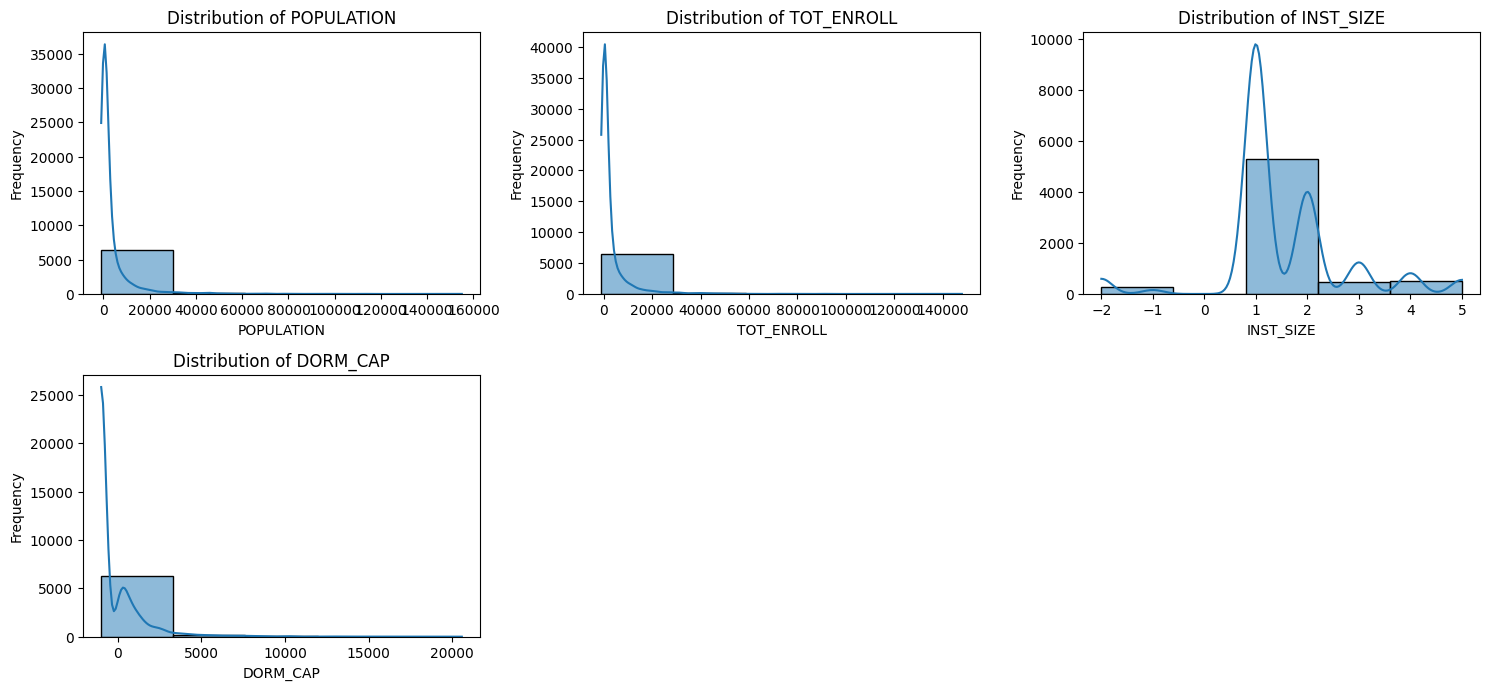

In [38]:
# Select relevant numerical columns
numerical_columns = ["POPULATION", "TOT_ENROLL", "INST_SIZE", "DORM_CAP"]

# Plot histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  
    sns.histplot(university[col], kde=True, bins=5)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


####  Insight

INT_SIZE distribution with frequesncy histogram is the most appropriate graph. Hence we can use this feature

##### **Histograms for categorical features**

This step is worth doing as it will provide with a deeper understanding of how categorical features are distributed and their relevance for the model. It helps to make informed decisions about feature engineering, preprocessing, and modeling strategies.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_stats/counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_stats/counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=densi

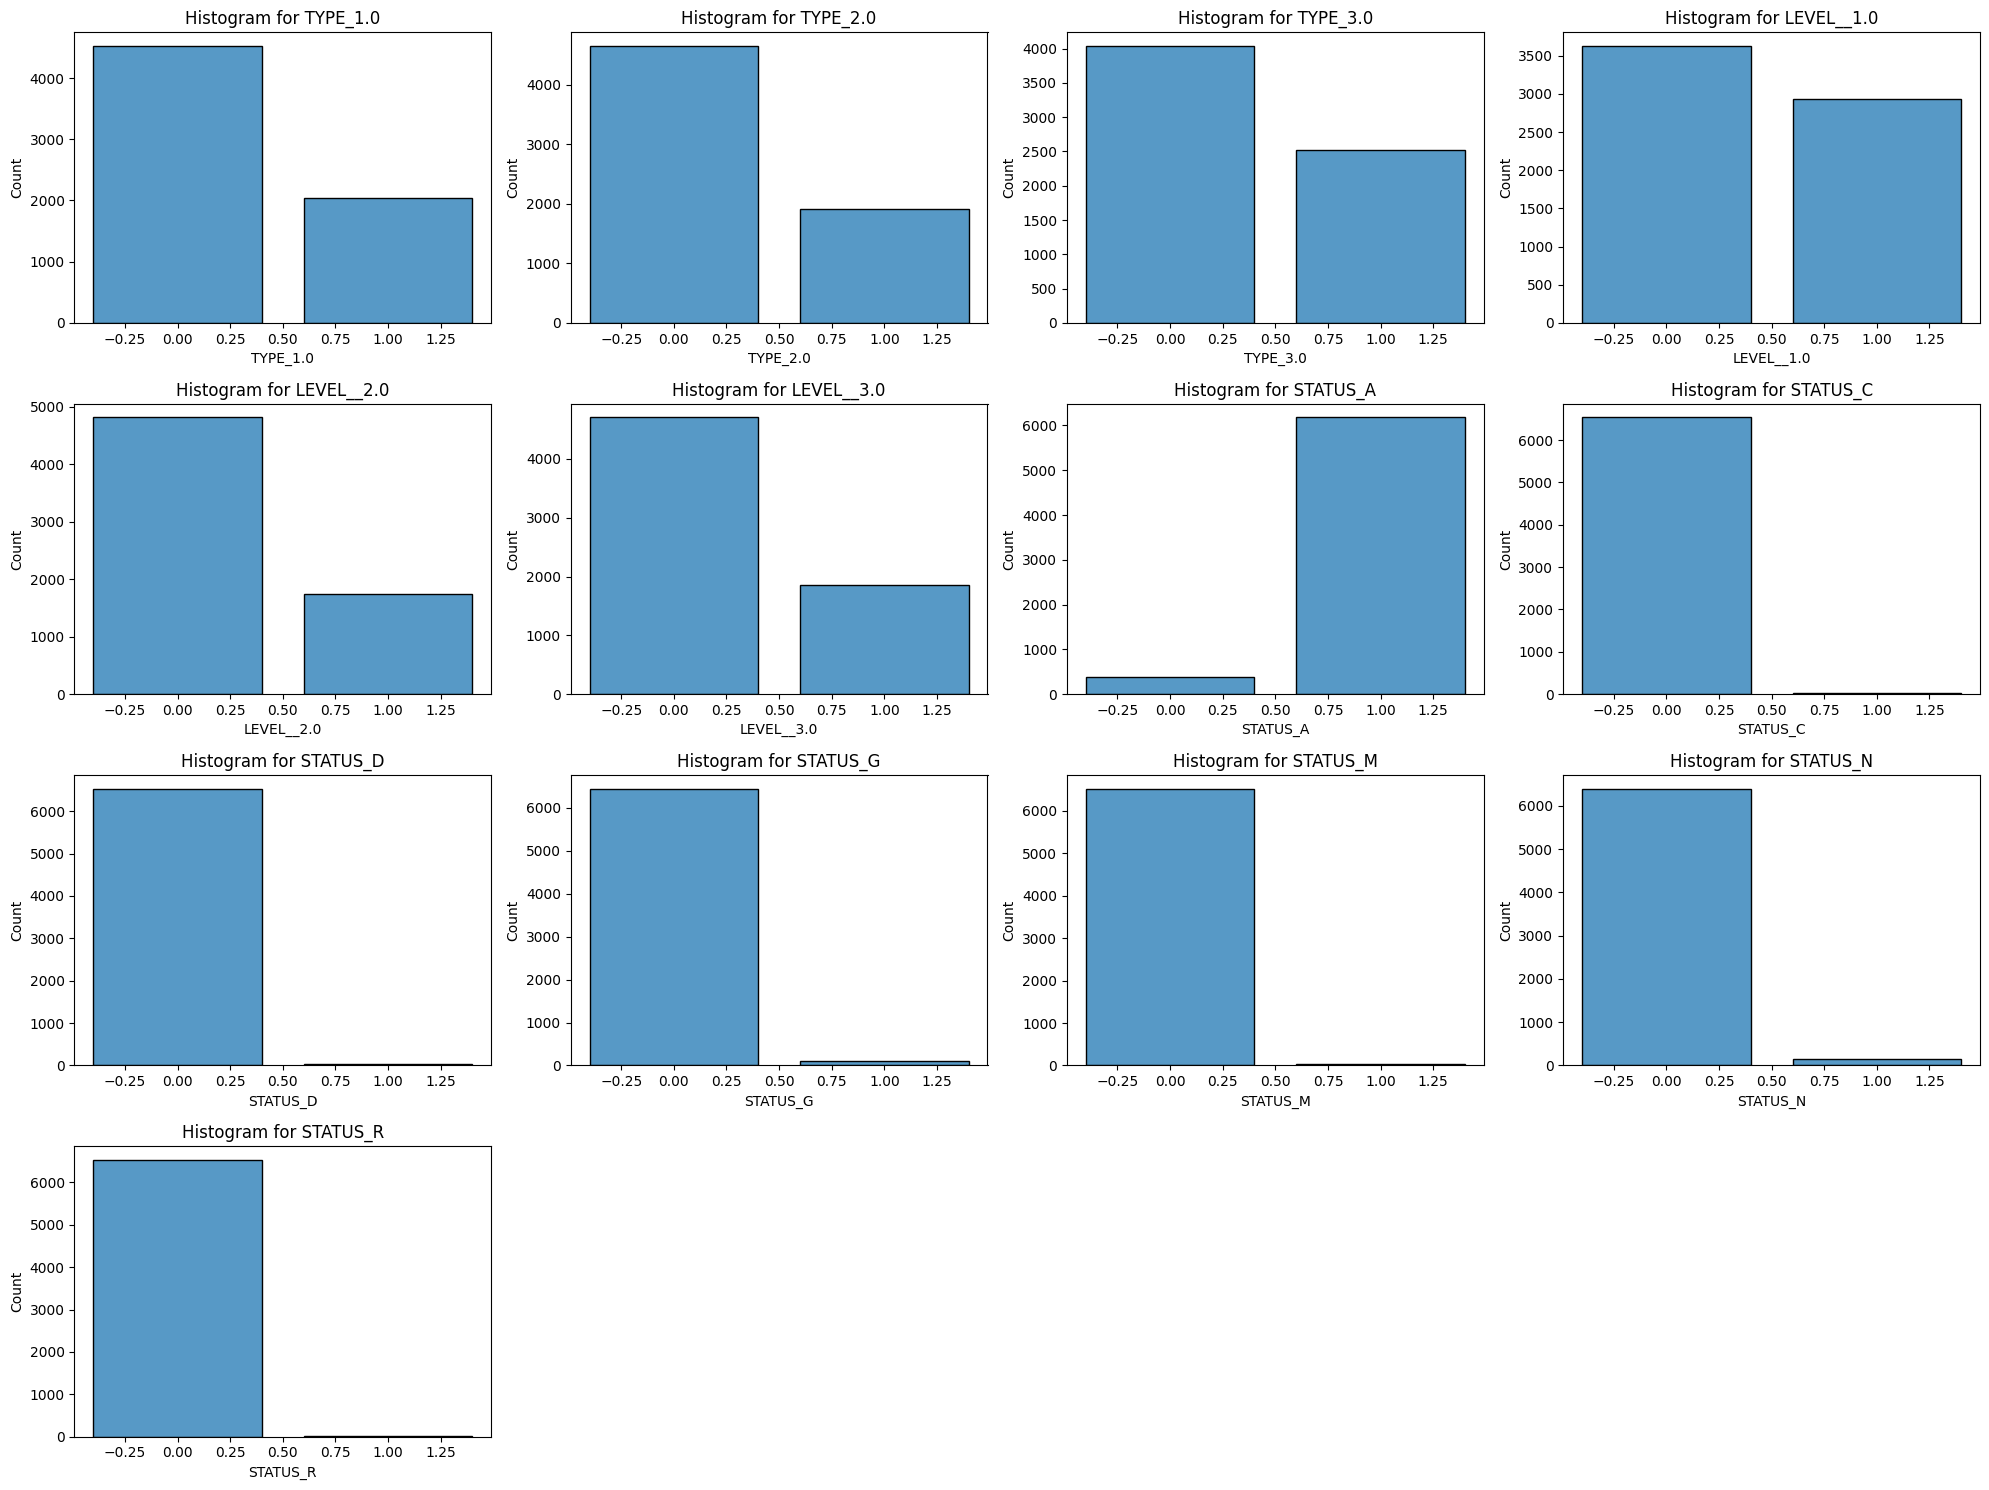

In [39]:

# List of categorical features to plot
categorical_ft = ["TYPE_1.0", "TYPE_2.0", "TYPE_3.0", 
                  "LEVEL__1.0", "LEVEL__2.0", "LEVEL__3.0", 
                  "STATUS_A", "STATUS_C", "STATUS_D", 
                  "STATUS_G", "STATUS_M", "STATUS_N", "STATUS_R"]

# Plot categorical histograms
plt.figure(figsize=(20, 15))

for i, col in enumerate(categorical_ft, 1):
    plt.subplot(4, 4, i)  
    sns.histplot(university[col], kde=False, discrete=True, shrink=0.8)
    plt.title(f"Histogram for {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


Based on the histograms, features like TYPE_1.0, TYPE_2.0, TYPE_3.0, and LEVEL__1.0, LEVEL__2.0, LEVEL__3.0 could be particularly relevant for analyzing geographic distribution.

For student population size, features like STATUS_A, STATUS_C, STATUS_D, STATUS_G, STATUS_M, STATUS_N, and STATUS_R might be informative. These features could represent different status categories, which could be correlated with the size of the student body.

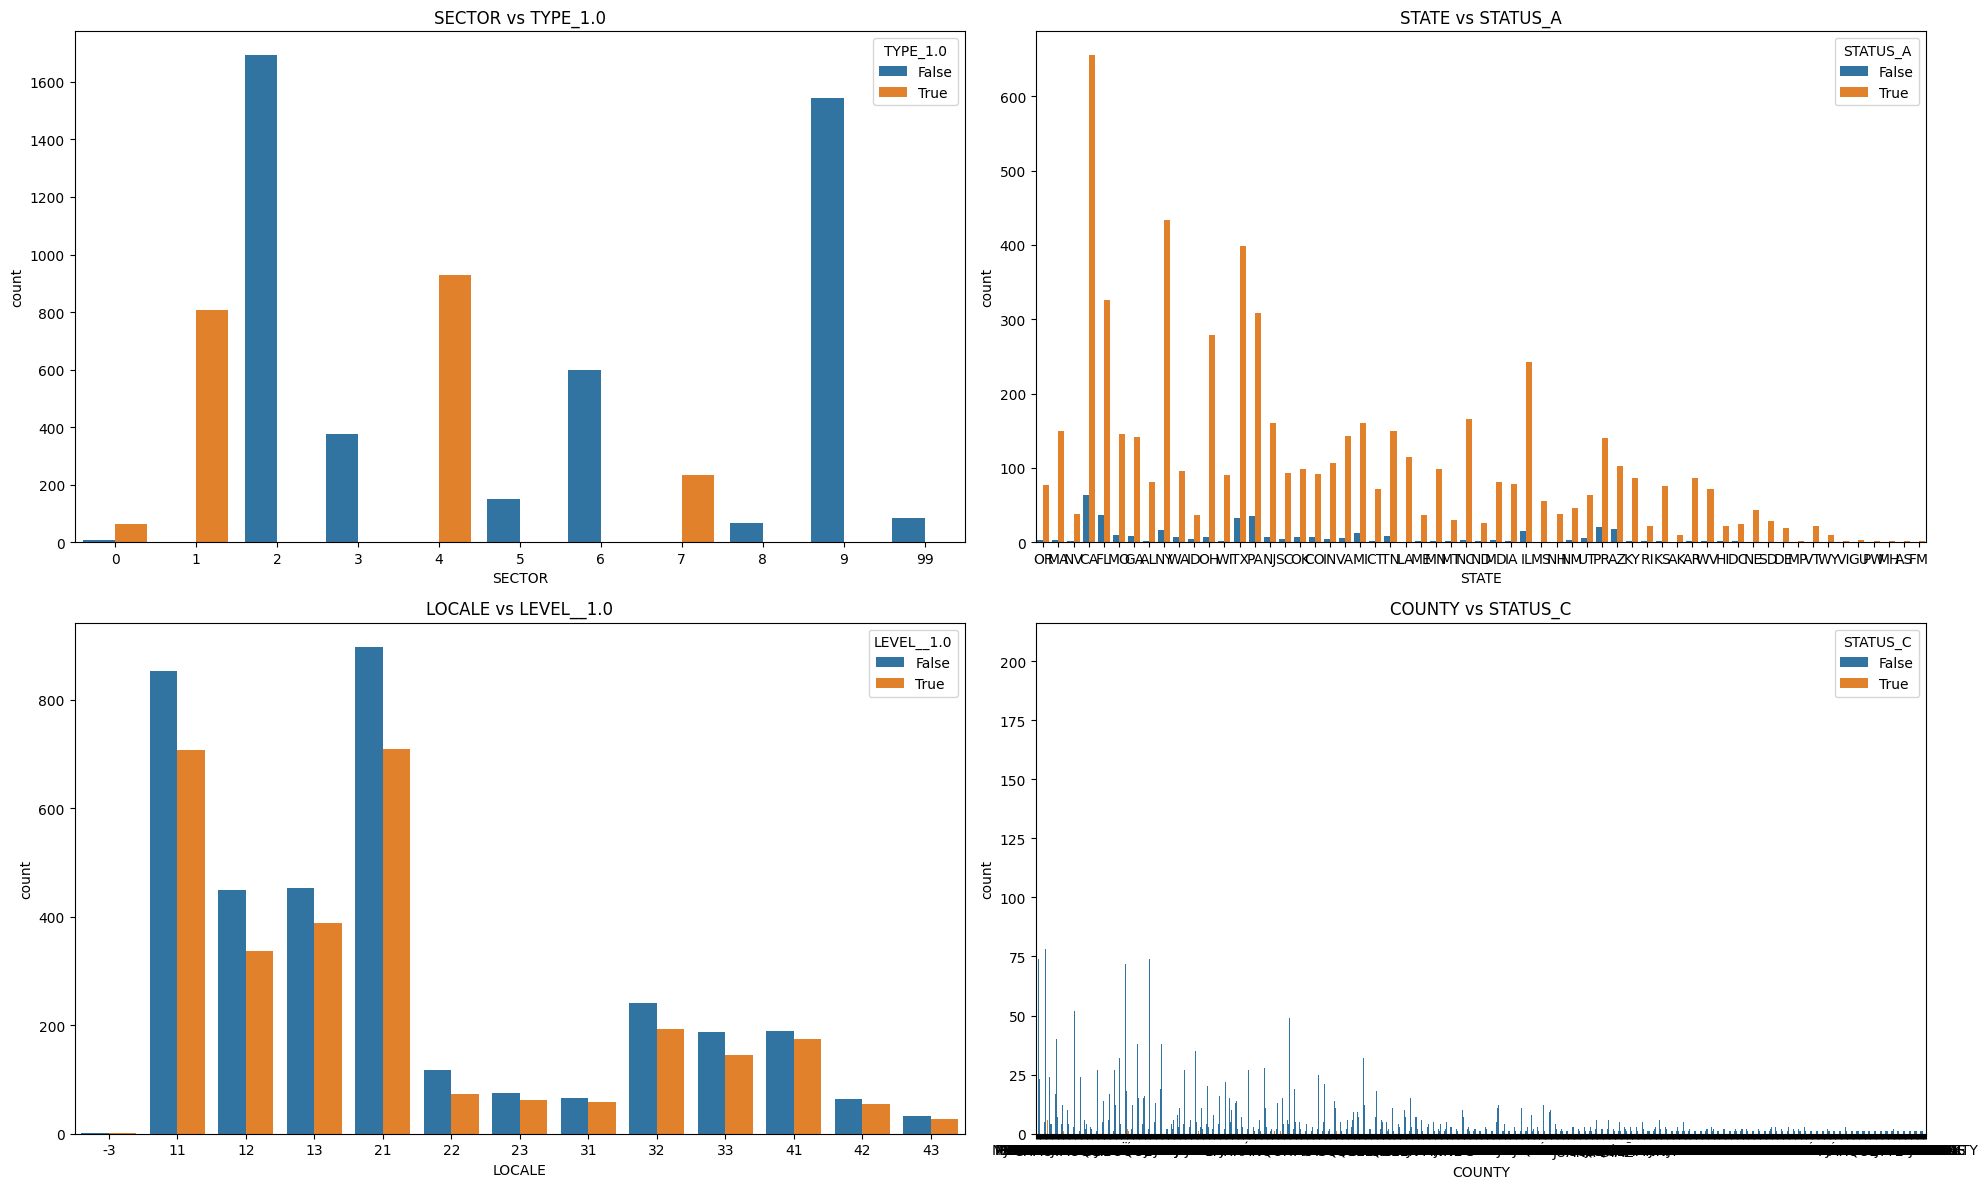

In [40]:
# Create a 2x2 grid of subplots with a size of 20 inches by 12 inches
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))  

# Plot distribution of universities by 'SECTOR' with 'TYPE_1.0' as hue
sns.countplot(x='SECTOR', hue='TYPE_1.0', data=university, ax=axarr[0][0])
axarr[0][0].set_title('SECTOR vs TYPE_1.0')

# Plot distribution of universities by 'STATE' with 'STATUS_A' as hue
sns.countplot(x='STATE', hue='STATUS_A', data=university, ax=axarr[0][1])
axarr[0][1].set_title('STATE vs STATUS_A')

# Plot distribution of 'LOCALE' with 'LEVEL__1.0' as hue
sns.countplot(x='LOCALE', hue='LEVEL__1.0', data=university, ax=axarr[1][0])
axarr[1][0].set_title('LOCALE vs LEVEL__1.0')

# Plot distribution of 'COUNTY' with 'STATUS_C' as hue
sns.countplot(x='COUNTY', hue='STATUS_C', data=university, ax=axarr[1][1])
axarr[1][1].set_title('COUNTY vs STATUS_C')

plt.tight_layout()
plt.show()


The plots provide insights into distribution across sectors, states, locales, and counties\
The visualization offers valuable insights into geographic variations in college types and potentially sizes.\
This visualization provides some initial clues, but a comprehensive recommendation system would require additional data on colleges and student preferences.

#### **Univariate Analysis**

/tmp/ipykernel_30/2129542904.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(x, p, 'k', linewidth=2, color='orange')


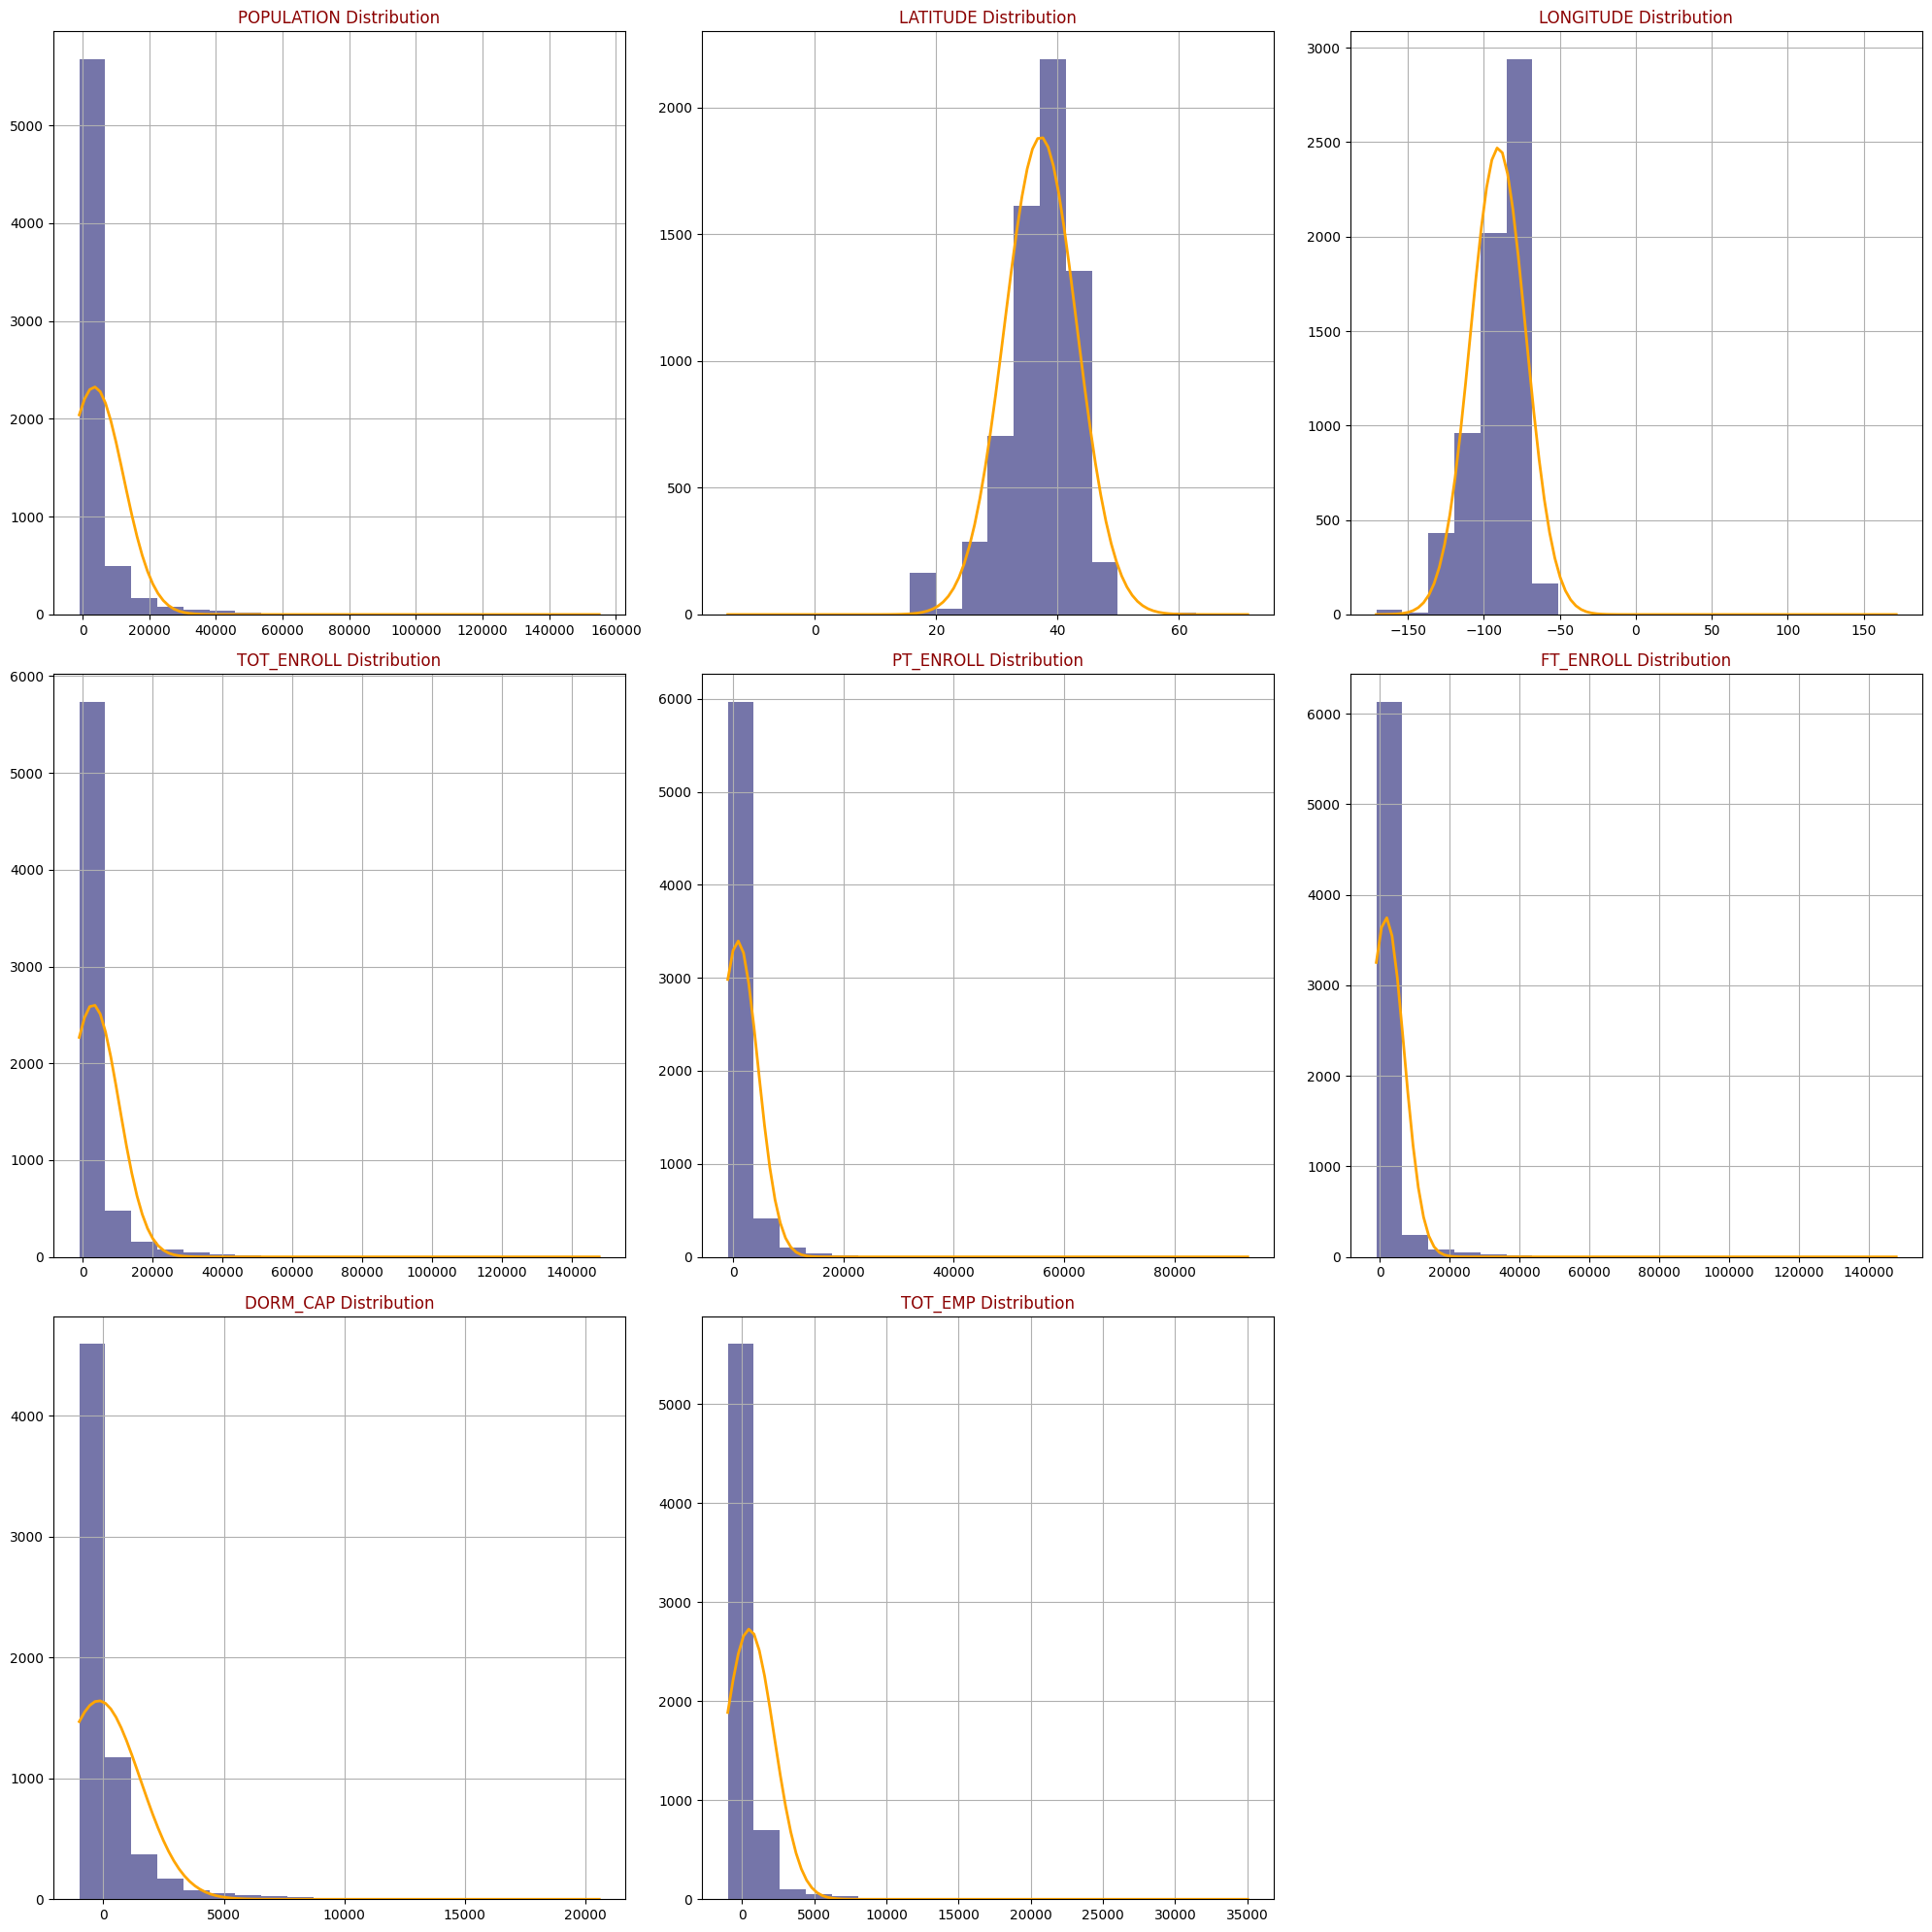

In [41]:
# List of numeric columns in your university dataset
numeric_columns = [
    'POPULATION', 'LATITUDE', 'LONGITUDE', 'TOT_ENROLL', 'PT_ENROLL',
    'FT_ENROLL', 'DORM_CAP', 'TOT_EMP'
]

# Function to plot histograms and overlay normal distributions
def draw_plots(df, var, rows, cols):
    fig = plt.figure(figsize=(20, 20))  # Set the figure size
    
    for i, f in enumerate(var):
        ax = fig.add_subplot(rows, cols, i + 1)
        
        # Plot the histogram
        df[f].hist(bins=20, ax=ax, facecolor='midnightblue', alpha=0.6)
        
        # Calculate the mean and standard deviation
        mu, std = df[f].mean(), df[f].std()
        
        # Generate x values for the normal distribution
        x = np.linspace(df[f].min(), df[f].max(), 100)
        
        # Generate the normal distribution curve based on the mean and std
        p = norm.pdf(x, mu, std)
        
        # Scale the normal distribution to match the histogram height
        p *= (len(df[f]) * np.diff(np.histogram(df[f], bins=20)[1])).max()
        
        # Plot the normal distribution curve
        ax.plot(x, p, 'k', linewidth=2, color='orange')
        
        # Set the title of the plot
        ax.set_title(f'{f} Distribution', color='DarkRed')
    
    fig.tight_layout()  # Adjust the layout for better spacing
    plt.show()  # Show the plot

# Call the function to generate plots for the numeric columns
draw_plots(df, numeric_columns, rows=3, cols=3)  # Adjust rows and cols as needed


#### **BIVARIATE ANALYSIS**

Check the correlation using:
##### **HeatMap**   

-Identify highly correlated features to avoid redundancy in model.\
-Use correlations to understand relationships, guiding feature selection and model improvements for recommendation system.

<Axes: >

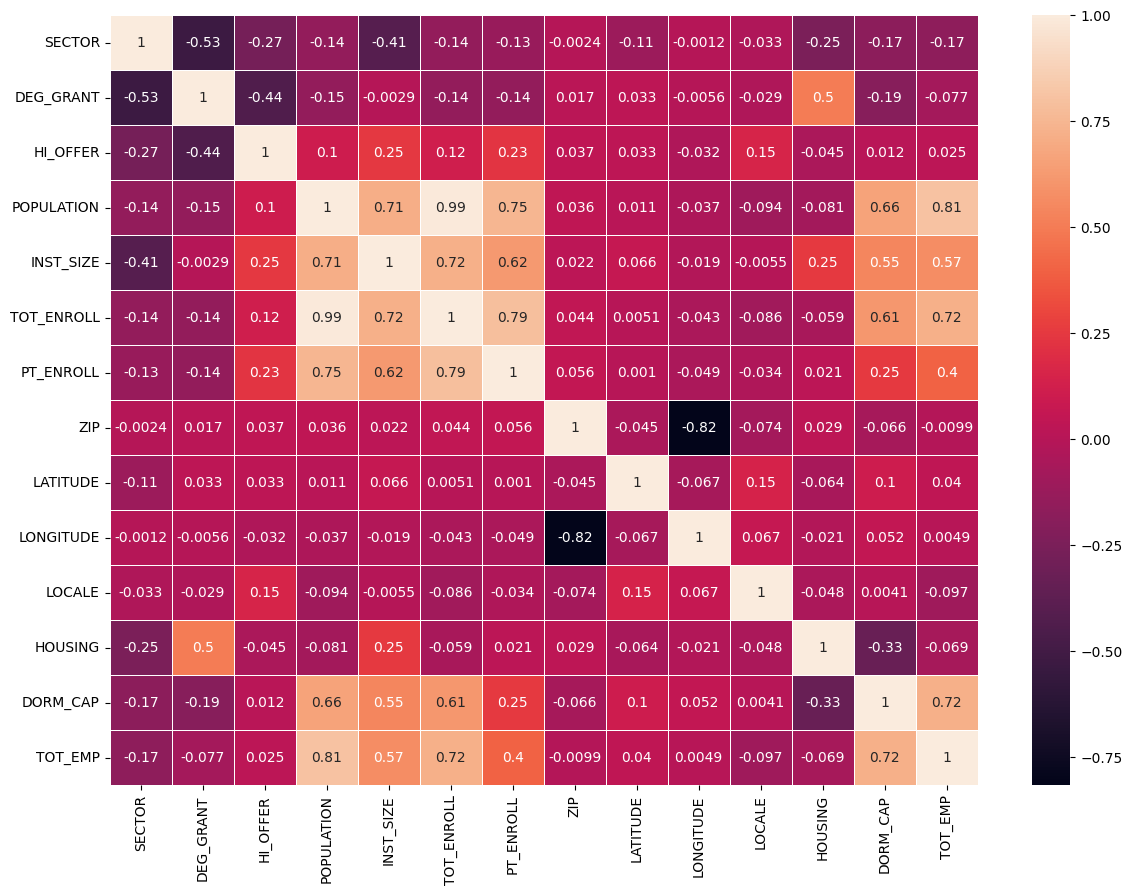

In [42]:
unis=university[["NAME","SECTOR","DEG_GRANT","HI_OFFER","NAICS_DESC","POPULATION","INST_SIZE","TOT_ENROLL","PT_ENROLL","CITY","STATE","ZIP","LATITUDE","LONGITUDE","LOCALE","COUNTY","COUNTYFIPS","HOUSING","DORM_CAP","TOT_EMP","WEBSITE"]]

plt.figure(figsize=(14, 10)) 
sns.heatmap(unis.corr(numeric_only=True), annot=True, linewidths=0.5)

In [43]:
# Select only numeric columns
numeric_unis = unis.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_unis.corr()

# Set a threshold for high correlation
threshold = 0.7

# Find pairs of highly correlated features
high_corr_pairs = []

# Iterate through the correlation matrix and extract pairs above the threshold
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            high_corr_pairs.append((colname_i, colname_j, correlation_matrix.iloc[i, j]))

# Display highly correlated feature pairs
print("Highly Correlated Features (Threshold > 0.7):")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: correlation = {pair[2]:.2f}")


Highly Correlated Features (Threshold > 0.7):
INST_SIZE and POPULATION: correlation = 0.71
TOT_ENROLL and POPULATION: correlation = 0.99
TOT_ENROLL and INST_SIZE: correlation = 0.72
PT_ENROLL and POPULATION: correlation = 0.75
PT_ENROLL and TOT_ENROLL: correlation = 0.79
LONGITUDE and ZIP: correlation = -0.82
TOT_EMP and POPULATION: correlation = 0.81
TOT_EMP and TOT_ENROLL: correlation = 0.72
TOT_EMP and DORM_CAP: correlation = 0.72


From the correlation analysis, it's evident that TOT_ENROLL has strong correlations with multiple other features.

Hence,using TOT_ENROLL as the main feature to represent institution size and student population to solve the Questions.

**PCA**

In [44]:

# Load and scale the data (adjust to include only numeric columns)
features = university.select_dtypes(include=['float64', 'int64'])  
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)


In [45]:
pca_result

array([[-5.02595186e-01, -2.54323105e-01, -5.68715501e-01, ...,
         1.11798531e-01,  4.56802704e-02,  1.18576721e-04],
       [ 1.00932555e+01, -6.51507987e-02,  3.04566028e+00, ...,
         1.09403963e-01, -5.62220112e-02,  1.86376918e-02],
       [ 1.36171248e-01,  7.50150904e-01, -1.26611422e+00, ...,
         1.25616148e-01,  2.89070196e-02, -8.78867153e-03],
       ...,
       [-1.40019431e+00, -3.68923198e-01,  3.87369706e-01, ...,
         1.00750147e+00, -7.51091008e-02, -1.55969757e-02],
       [-2.07428041e+00, -1.67965236e+00,  1.57437002e+00, ...,
        -1.54801936e-01,  2.74714632e-02,  8.29952300e-02],
       [-1.28930187e+00, -4.53095249e-01,  6.34252539e-01, ...,
         7.82373501e-01, -6.93552675e-02, -1.53190367e-02]])

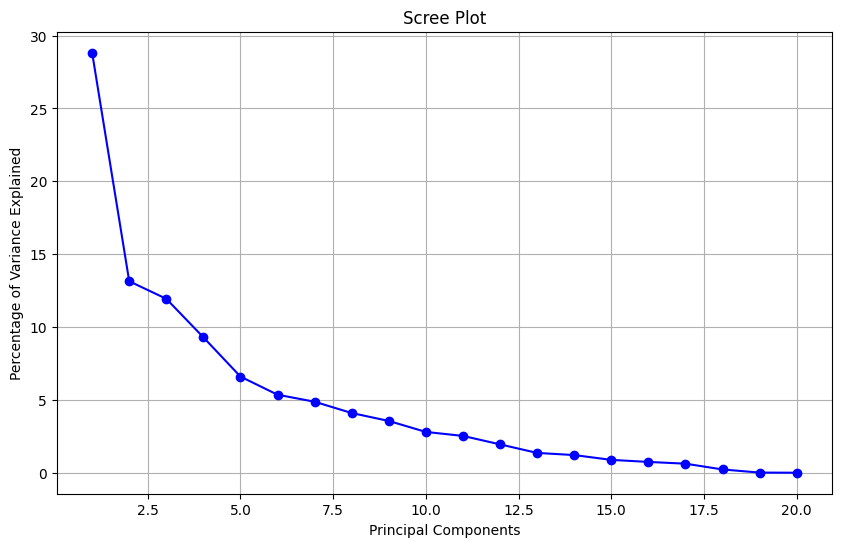

In [46]:
# Calculate explained variance
explained_var = pca.explained_variance_ratio_ * 100  

# Plot Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_var) + 1), explained_var, 'o-', color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Variance Explained')
plt.grid(True)
plt.show()


/tmp/ipykernel_30/3408110240.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pc1, pc2, alpha=0.6, cmap='viridis')


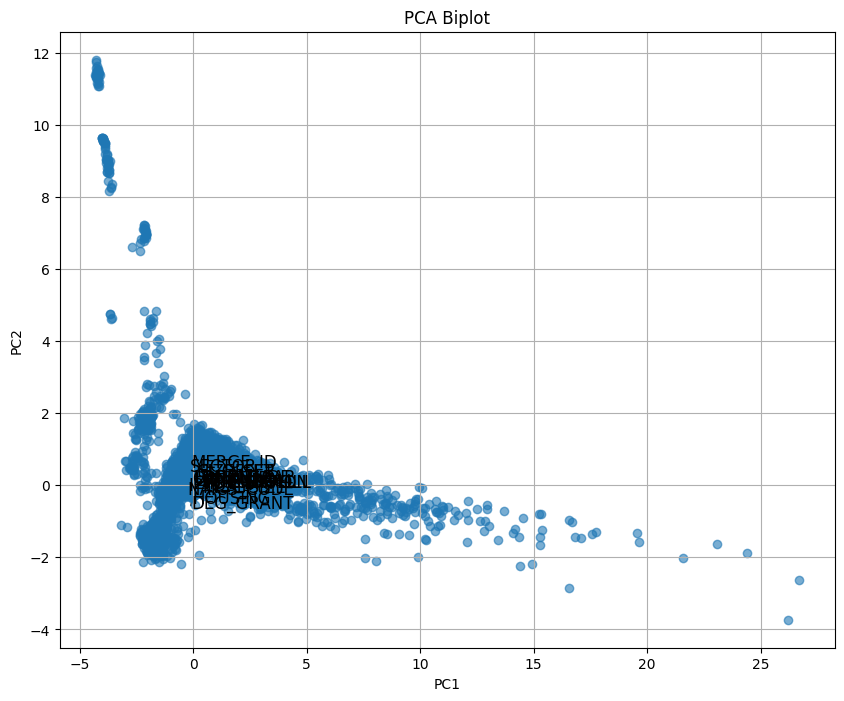

In [47]:


# Select first 2 principal components for visualization
pc1, pc2 = pca_result[:, 0], pca_result[:, 1]
plt.figure(figsize=(10, 8))

# Biplot arrows for features
for i, feature in enumerate(features.columns):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], 
              color='black', alpha=0.7, head_width=0.02)
    plt.text(pca.components_[0, i] * 1.15, pca.components_[1, i] * 1.15, feature, fontsize=12)

# Plot data points
plt.scatter(pc1, pc2, alpha=0.6, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Biplot')
plt.grid(True)
plt.show()


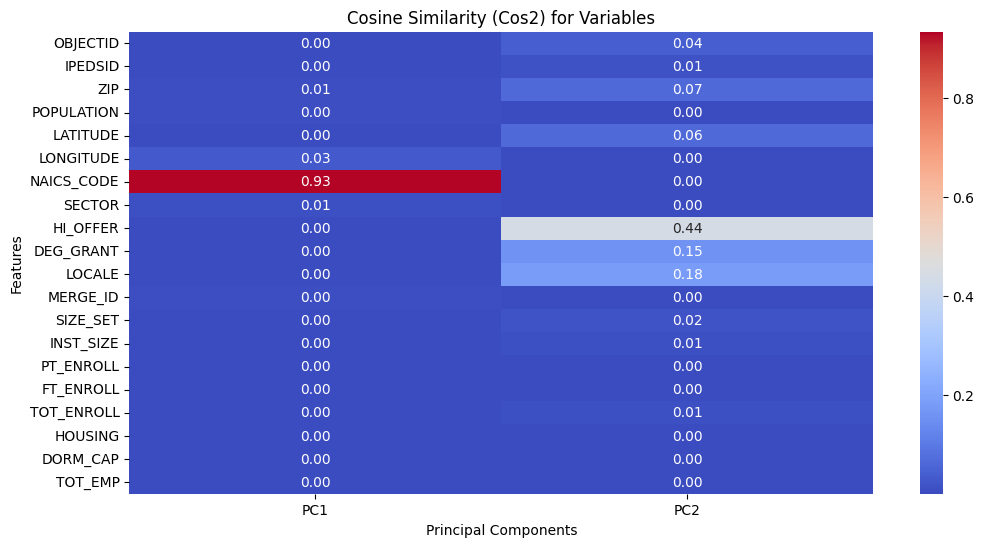

In [48]:
# Calculate cosine squared (contribution of each variable to components)
cos2 = np.square(pca.components_[:, :2])  # First two PCs only

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cos2, cmap='coolwarm', annot=True, fmt=".2f", xticklabels=['PC1', 'PC2'], yticklabels=features.columns)
plt.title('Cosine Similarity (Cos2) for Variables')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.show()


### **QUESTION 1**:
How does the geographic distribution of colleges relate to their type and student population size?

The Q-Q plot is an excellent tool to visually compare the distribution of your data to a normal distribution

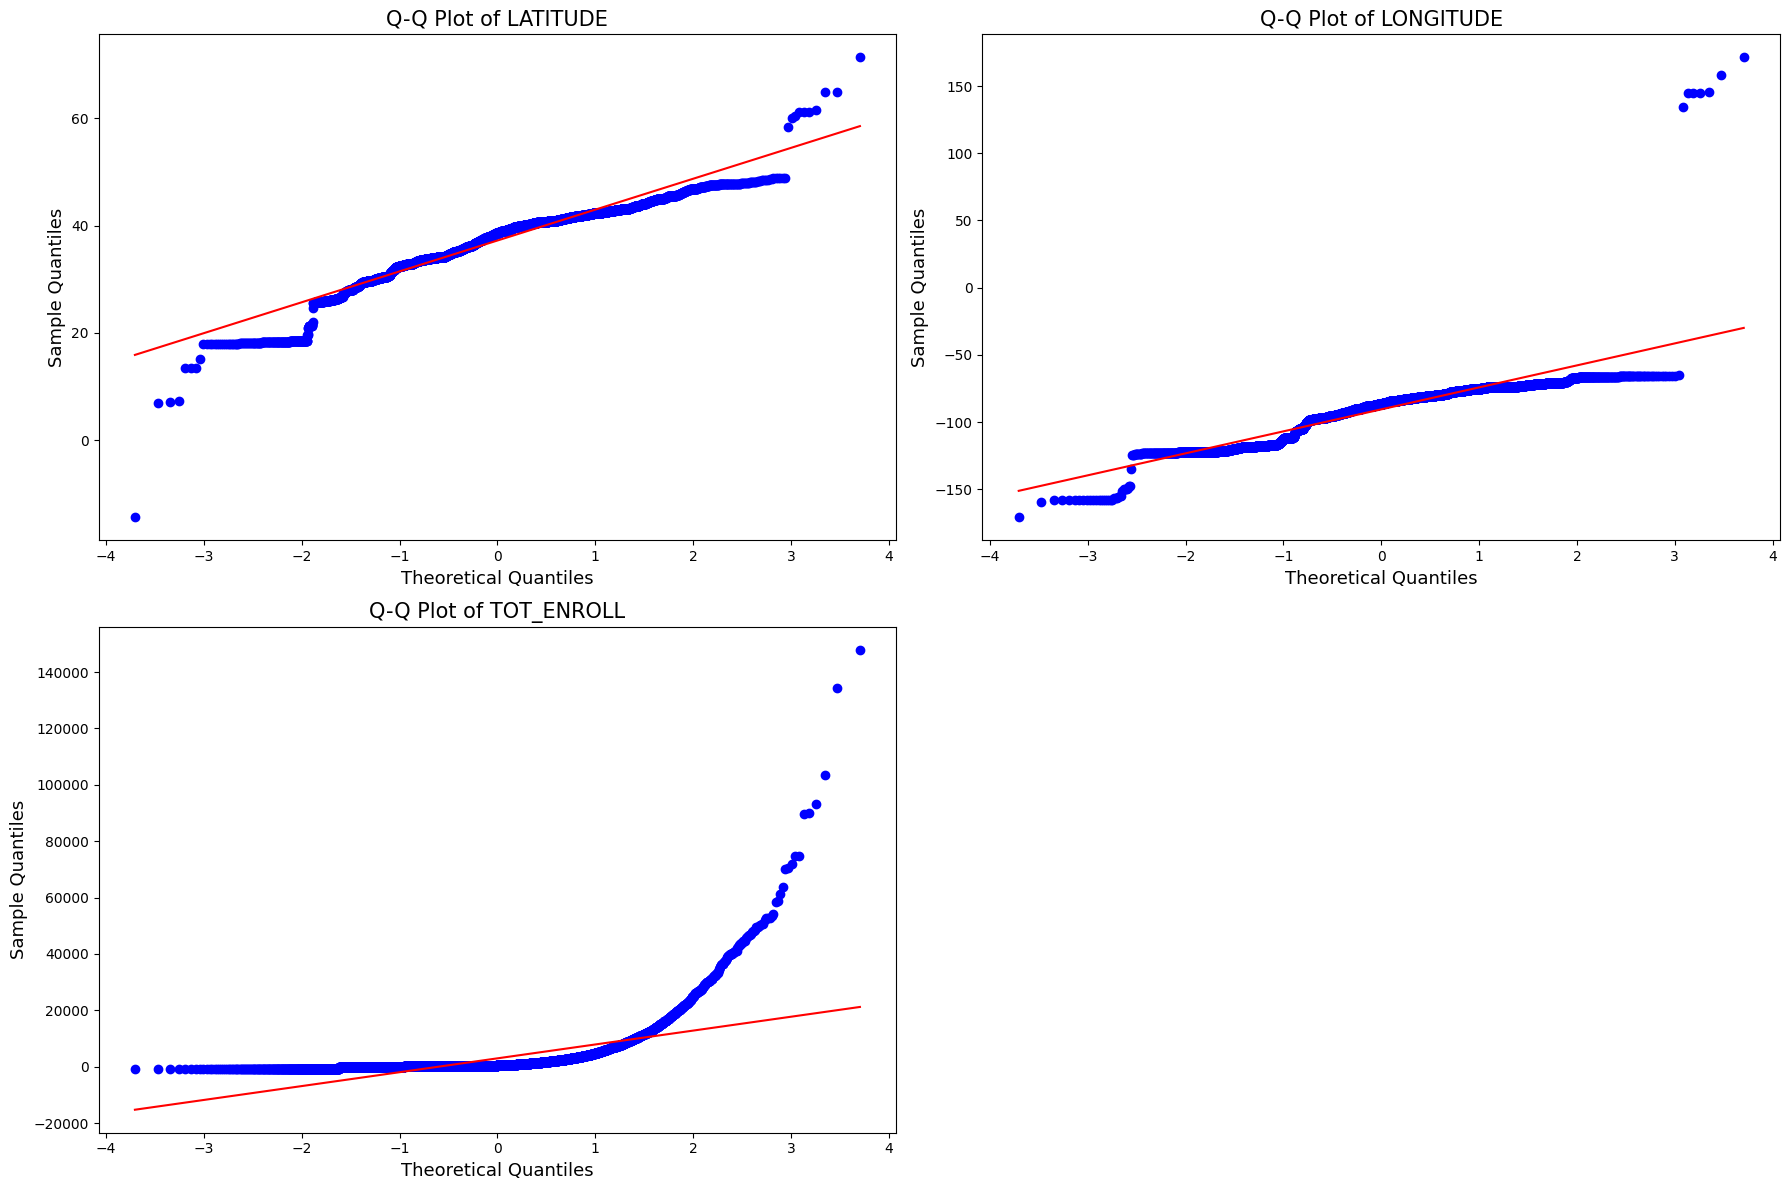

In [49]:

from scipy.stats import probplot

# List of features to visualize
features = ['LATITUDE', 'LONGITUDE',  'TOT_ENROLL']

# Set up the plotting area
plt.figure(figsize=(18, 12))

# Loop through the list of features to create individual Q-Q plots
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)  # Arrange the plots in a 2x2 grid
    
    # Create Q-Q plot
    probplot(university[feature].dropna(), dist="norm", plot=plt)
    
    # Set plot title and labels
    plt.title(f"Q-Q Plot of {feature}", fontsize=15)
    plt.xlabel("Theoretical Quantiles", fontsize=13)
    plt.ylabel("Sample Quantiles", fontsize=13)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


The points fall roughly along the reference line and there's minimal deviation, it suggests that data closely follows a normal distribution.

In [50]:
# Create the map as before
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Iterate over rows to add markers based on TYPE_1.0, TYPE_2.0, and TYPE_3.0
for _, row in university.iterrows():
    # Set color based on the university type
    if row['TYPE_1.0'] == 1:  # Assuming 1 means the university is of TYPE_1.0
        color = 'blue'  # For TYPE_1.0
    elif row['TYPE_2.0'] == 1:  # Assuming 1 means the university is of TYPE_2.0
        color = 'green'  # For TYPE_2.0
    elif row['TYPE_3.0'] == 1:  # Assuming 1 means the university is of TYPE_3.0
        color = 'orange'  # For TYPE_3.0
    else:
        color = 'gray'  # Default color for unknown or missing type

    # Add the marker to the map
    folium.CircleMarker(
        location=(row['LATITUDE'], row['LONGITUDE']),
        radius=max(row['TOT_ENROLL'] / 10000, 2),  # Adjust size based on enrollment
        color=color,
        fill=True,
        popup=f"{row['NAME']} ({row.get('SECTOR', 'Unknown')})\nStudents: {int(row['TOT_ENROLL'])}"
    ).add_to(m)

# Save the map
m.save("university_distribution_map_by_type.html")
print("Map saved as 'university_distribution_map_by_type.html'")


Map saved as 'university_distribution_map_by_type.html'


### **QUESTION 2**:
How can a system be developed to assist students seeking admission in selecting the most suitable colleges based on their preferences, academic performance, and other personal factors?

In [105]:


class UniversityRecommender:
    def __init__(self, n_neighbors=10):
        # Feature selection
        self.features = ['TOT_ENROLL', 'INST_SIZE', 'STATE', 'CITY']
        
        # Preprocessing components
        self.numerical_features = ['TOT_ENROLL', 'INST_SIZE']
        self.categorical_features = ['STATE', 'CITY']
        
        # Preprocessing pipeline
        self.preprocessor = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), self.numerical_features),
                ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), 
                 self.categorical_features)
            ])
        
        # Nearest Neighbors model
        self.n_neighbors = n_neighbors
        self.model = None
        self.X_train = None
        self.y_train = None

    def preprocess_data(self, university):
        # Handle missing values
        university = university.dropna(subset=self.features)
        
        # Replace zero enrollments with mean
        university['TOT_ENROLL'] = university['TOT_ENROLL'].replace(0, np.nan)
        mean_enrollment = university['TOT_ENROLL'].mean()
        university['TOT_ENROLL'].fillna(mean_enrollment)
        
        # Categorize enrollment
        def categorize_enrollment(enrollment):
            if enrollment < 5000:
                return 'Low'
            elif 5000 <= enrollment < 15000:
                return 'Medium'
            else:
                return 'High'
        
        university['Enrollment_Category'] = university['TOT_ENROLL'].apply(categorize_enrollment)
        
        return university

    def fit(self, university):
        # Preprocess the data
        processed_university = self.preprocess_data(university)
        
        # Prepare features
        X = self.preprocessor.fit_transform(processed_university[self.features])
        y = processed_university['Enrollment_Category']
        
        # Encode target variable
        category_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
        y_encoded = y.map(category_mapping)
        
        # Fit Nearest Neighbors model
        self.model = NearestNeighbors(n_neighbors=self.n_neighbors, metric='cosine')
        self.model.fit(X)
        
        # Store training data
        self.X_train = X
        self.y_train = y_encoded
        
        return self

    def recommend_colleges(self, preferences, university, top_k=5):
        # Prepare input data
        input_data = pd.DataFrame([preferences])
        
        # Preprocess input
        X_input = self.preprocessor.transform(input_data[self.features])
        
        # Find nearest neighbors
        distances, indices = self.model.kneighbors(X_input)
        
        # Get recommended colleges
        recommendations = university.iloc[indices[0]]
        
        return recommendations

    def evaluate_performance(self):
        # Perform cross-validation
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        
        # Placeholder for performance metrics
        cv_precision = []
        cv_recall = []
        cv_f1 = []
        
        # Cross-validation loop
        for train_index, test_index in cv.split(self.X_train, self.y_train):
            X_train_fold, X_test_fold = self.X_train[train_index], self.X_train[test_index]
            y_train_fold, y_test_fold = self.y_train.iloc[train_index], self.y_train.iloc[test_index]
            
            # Fit model on training fold
            model_fold = NearestNeighbors(n_neighbors=self.n_neighbors, metric='cosine')
            model_fold.fit(X_train_fold)
            
            # Predict for test fold
            distances, indices = model_fold.kneighbors(X_test_fold)
            
            # Predict categories based on majority vote
            predictions = []
            for idx in indices:
                neighbor_categories = y_train_fold.iloc[idx].values
                predicted_category = np.bincount(neighbor_categories).argmax()
                predictions.append(predicted_category)
            
            # Compute metrics for this fold
            from sklearn.metrics import precision_score, recall_score, f1_score
            cv_precision.append(precision_score(y_test_fold, predictions, average='weighted'))
            cv_recall.append(recall_score(y_test_fold, predictions, average='weighted'))
            cv_f1.append(f1_score(y_test_fold, predictions, average='weighted'))
        
        # Aggregate cross-validation results
        print("\n")
        print("Cross-Validation Results:")
        print(f"Precision: {np.mean(cv_precision):.4f} ")
        print(f"Recall: {np.mean(cv_recall):.4f} ")
        print(f"F1 Score: {np.mean(cv_f1):.4f} ")
        
        return {
            'precision': np.mean(cv_precision),
            'recall': np.mean(cv_recall),
            'f1_score': np.mean(cv_f1)
        }


def main():

    university = pd.read_excel('/kaggle/input/university/us-colleges-and-universities.xlsx')
    
    # Initialize and fit the recommender
    recommender = UniversityRecommender(n_neighbors=10)
    recommender.fit(university)
    
    # Example user preferences
    user_preferences = {
        'TOT_ENROLL': 12002, 
        'INST_SIZE': 2, 
        'STATE': 'MA', 
        'CITY': 'BOSTON'
    }
    
    # Get recommendations
    recommendations = recommender.recommend_colleges(user_preferences, university)
    
    # Print recommendations
    print("\nRecommended Colleges:")
    for _, row in recommendations.iterrows():
        print(f"{row['NAME']} in {row['CITY']}, {row['STATE']},  {row['WEBSITE']}")
    
    # Evaluate model performance
    performance = recommender.evaluate_performance()

if __name__ == "__main__":
    main()


Recommended Colleges:
BUNKER HILL COMMUNITY COLLEGE in BOSTON, MA,  www.bhcc.mass.edu/
MCPHS UNIVERSITY in BOSTON, MA,  www.mcphs.edu/
UNIVERSITY OF MASSACHUSETTS-BOSTON in BOSTON, MA,  www.umb.edu/
WENTWORTH INSTITUTE OF TECHNOLOGY in BOSTON, MA,  https://wit.edu/
SUFFOLK UNIVERSITY in BOSTON, MA,  https://www.suffolk.edu/
BERKLEE COLLEGE OF MUSIC in BOSTON, MA,  www.berklee.edu/
SIMMONS UNIVERSITY in BOSTON, MA,  www.simmons.edu/
BOSTON UNIVERSITY in BOSTON, MA,  www.bu.edu/
NORTHEASTERN UNIVERSITY LIFELONG LEARNING NETWORK in BOSTON, MA,  https://www.northeastern.edu/learnforlife/
NORTHEASTERN UNIVERSITY in BOSTON, MA,  www.northeastern.edu/


Cross-Validation Results:
Precision: 0.9517 
Recall: 0.9428 
F1 Score: 0.9451 
